<a href="https://colab.research.google.com/github/Pinsuda-K/diabetes-eda-python/blob/main/notebooks/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning using Python

Objective: สร้าง model ที่ดีที่สุดโดยใช้ข้อมูลจาก code ด้านล่าง

* email : pinsuda.kos@gmail.com

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X,y = datasets.load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [ ]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

#Data Cleaning
*(Quick check and data exploring before modeling)*
- Dataset -> Dataframe for easier analysis
- Practice cleaning data with pre-cleaned data; diabetes dataset.

In [ ]:
diabetes = datasets.load_diabetes()
X_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_df = pd.DataFrame(diabetes.target, columns=['target'])
print(X_df.isnull().sum())  #Check missing value
print(X_df.dtypes)  #Check data type
print(X_df.describe())  #Check stats

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2  

In [ ]:
df = pd.concat([X_df, y_df], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#Exploratory Data Analysis (EDA)

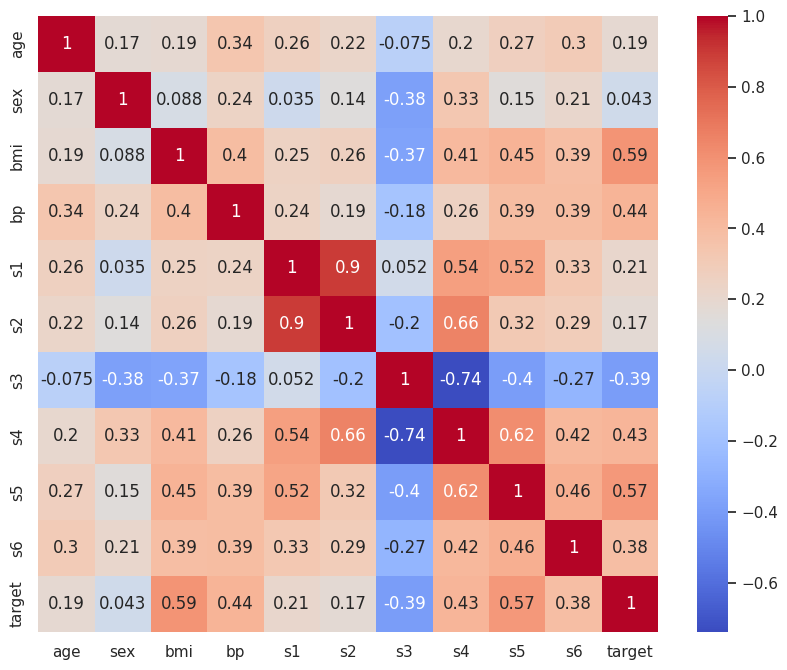

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

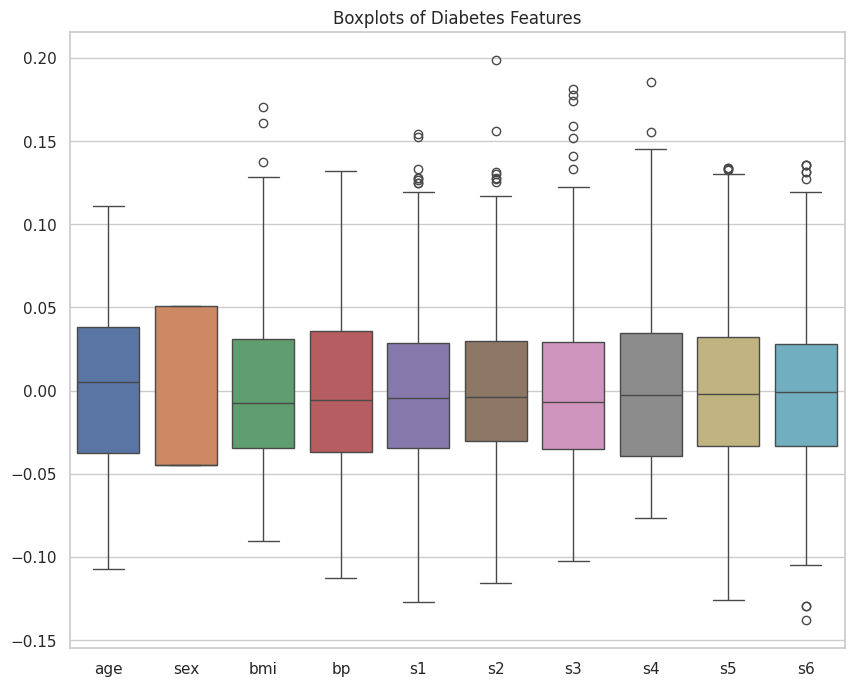

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_df)
plt.title('Boxplots of Diabetes Features')
plt.xticks(rotation=0)
plt.show()

#Model Training: Train-Test Split
- ใช้ sklearn.model_selection
- Model tuning using hold-up method
- Split data; 80% train, 20% test
- Train model -> Linear Regression


In [ ]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train) #เริ่มเทรนโมเดล
y_pred = LR.predict(X_test) #predict on test

MSE_LR= mean_squared_error(y_test, y_pred) #evaluate
R2_LR= r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", MSE_LR)
print("R²:", R2_LR)

Mean Squared Error (MSE): 2900.193628493482
R²: 0.4526027629719195


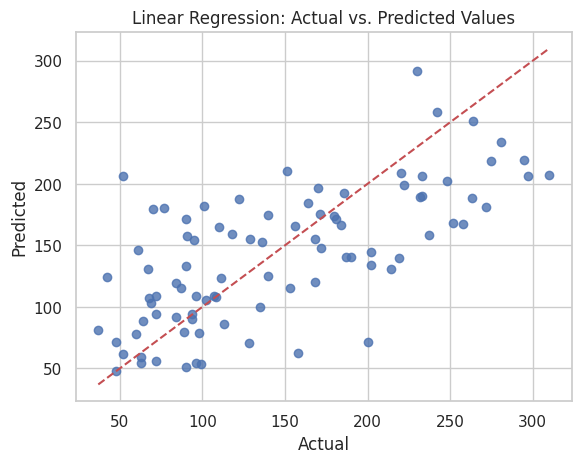

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

- Train model -> Decision Tree
- Decision Tree vs. Linear Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
DT.fit(X_train, y_train) #เริ่มเทรนโมเดล
y_pred = DT.predict(X_test) #predict on test

MSE_DT = mean_squared_error(y_test, y_pred) #evaluate
R2_DT = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", MSE_DT)
print("R²:", R2_DT)
#only 'random_state=42' -> low R2 score at 0.06 -> overfitting
# max_depth increase R2 score to 0.42

Mean Squared Error (MSE): 3094.497280328023
R²: 0.4159289074356103


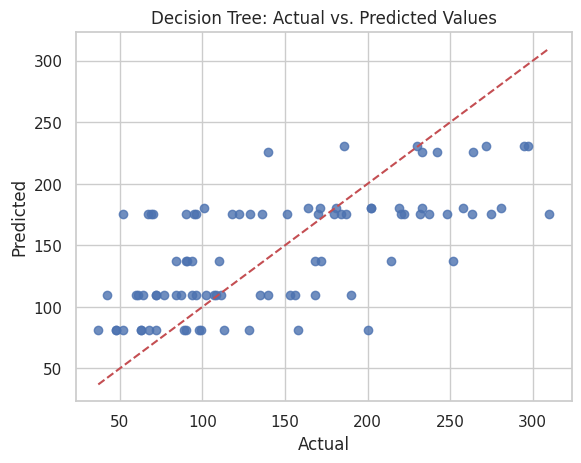

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

##It can be seen that:
- Linear Regression $R^2$ score = 0.45
- Decision Tree $R^2$ score = 0.42
- No single model is evidently superior; variance in the target -> data possibly don't have strong nonlinear patterns that tree can exploit better
- LR has better baseline than DT
- DT is less overfit
- Random Forest = many decision trees combined -> reduces overfitting

- Train model -> Random Forest
- Random Forest vs. Decision Tree vs. Linear Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
R2_RF = r2_score(y_test, y_pred)
MSE_RF = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", MSE_RF)
print("R²:", R2_RF)

Mean Squared Error (MSE): 2952.0105887640448
R²: 0.4428225673999313


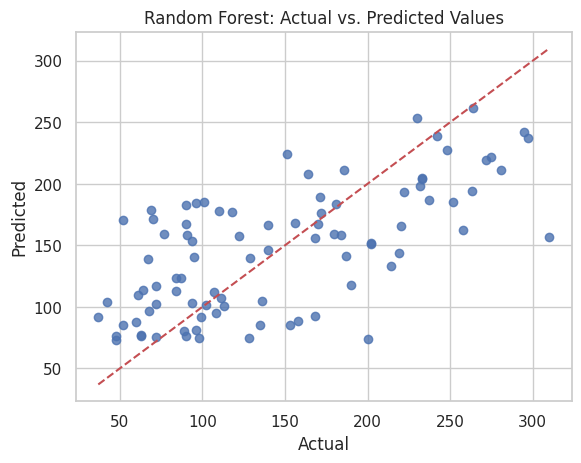

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

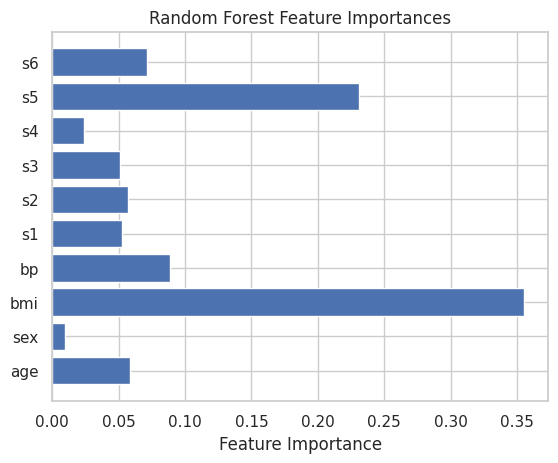

In [ ]:
importances = RF.feature_importances_ #To show what features matter most: bmi to diabetes
feature_names = diabetes.feature_names
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
print("R² Linear Regression:", round(R2_LR, 2))
print("R² Decision Tree:", round(R2_DT, 2))
print("R² Random Forest:", round(R2_RF, 2))

#The conclusion will be written at the end of the code

R² Linear Regression: 0.45
R² Decision Tree: 0.42
R² Random Forest: 0.44


#Model Evaluation and Comparision: Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
#cross-validation

LR_scores = cross_val_score(LR, X, y, cv=5, scoring='r2')
DT_scores = cross_val_score(DT, X, y, cv=5, scoring='r2')
RF_scores = cross_val_score(RF, X, y, cv=5, scoring='r2')

print("Linear Regression:  Mean R² = {:.2f}, STD Dev. = ±{:.2f}".format(LR_scores.mean(), LR_scores.std()))
print("Decision Tree:      Mean R² = {:.2f}, STD Dev. = ±{:.2f}".format(DT_scores.mean(), DT_scores.std()))
print("Random Forest:      Mean R² = {:.2f}, STD DEv. = ±{:.2f}".format(RF_scores.mean(), RF_scores.std()))

Linear Regression:  Mean R² = 0.48, STD Dev. = ±0.05
Decision Tree:      Mean R² = 0.34, STD Dev. = ±0.08
Random Forest:      Mean R² = 0.42, STD DEv. = ±0.06


In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=10, random_state=42)

#เตรียมข้อมูล
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
mean_r2_scores = [LR_scores.mean(), DT_scores.mean(), RF_scores.mean()] #mean R2 score calculated and stored
std_r2_scores = [LR_scores.std(), DT_scores.std(), RF_scores.std()] #STD of R2 score is calculated and stored
all_cv_scores = [LR_scores, DT_scores, RF_scores] #for boxplot

#mean_r2_scores = mean of R2 score for each model; Linear regression, Decision tree, Random forest.
#std_r2_scores = STD dev. ของ R2 scores นั้นๆ ของทั้งสามโมเดล

(0.2050295610593335, 0.581585013420546)

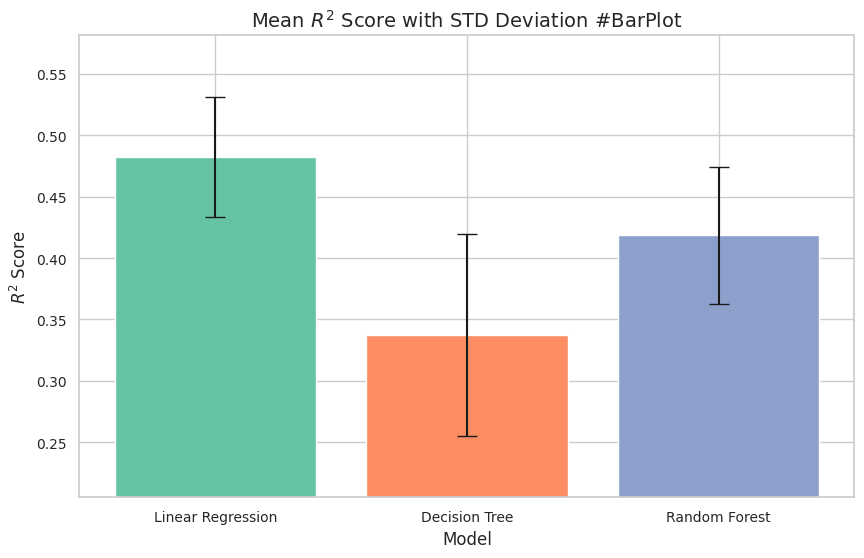

In [ ]:
#Seaborn styling
sns.set_theme(style="whitegrid")
palette_colors = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))

bars = plt.bar(model_names, mean_r2_scores, yerr=std_r2_scores, capsize=7, color=palette_colors[:len(model_names)])
#yerr ทำให้เป็นlist
#len(obj,/) returns the number of items in a container

plt.ylabel('$R^2$ Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Mean $R^2$ Score with STD Deviation #BarPlot', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#y-axis limits calculation: mean +/- STD dev.
y_min_bar = min(np.array(mean_r2_scores) - np.array(std_r2_scores)) - 0.05
y_max_bar = max(np.array(mean_r2_scores) + np.array(std_r2_scores)) + 0.05
#all R2 scores are not negative
plt.ylim(bottom=y_min_bar, top=y_max_bar if y_max_bar > y_min_bar + 0.1 else y_min_bar + 0.1) #set limits to make sure there is a minimum visible range

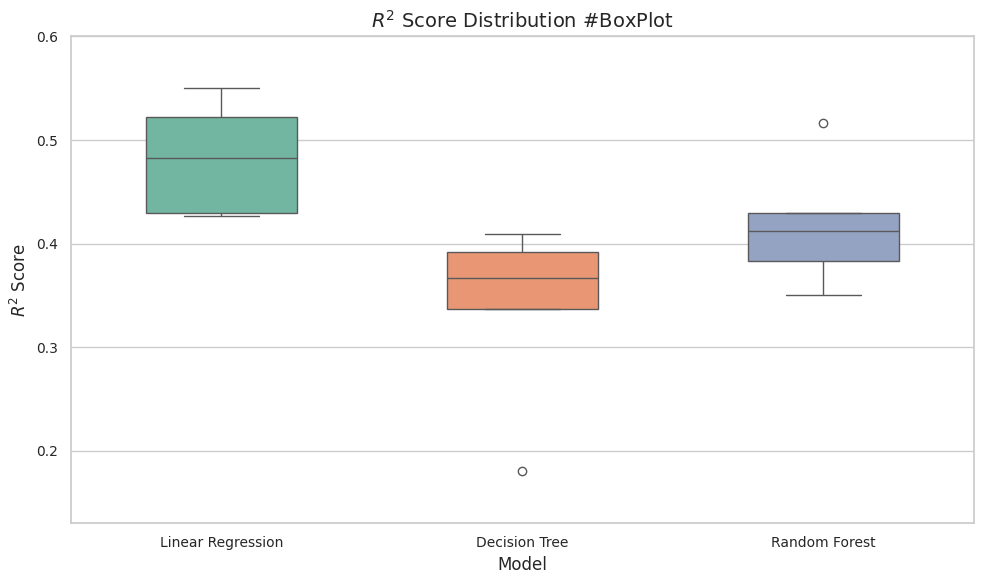

In [ ]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=all_cv_scores, palette=palette_colors[:len(model_names)], width=0.5)

plt.xticks(ticks=np.arange(len(model_names)), labels=model_names, fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel('$R^2$ Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('$R^2$ Score Distribution #BoxPlot', fontsize=14)

#Adjust y-axis limits to cover all data points for box plots
#หา overall range ของ R2 scores เพื่อหา y-axis limits; max and min เพิ่ม
all_scores_flat = np.concatenate(all_cv_scores)
y_min_box = all_scores_flat.min() - 0.05
y_max_box = all_scores_flat.max() + 0.05
#set limits to ensure there is a minimum visible range
plt.ylim(bottom=y_min_box, top=y_max_box if y_max_box > y_min_box + 0.1 else y_min_box + 0.1)

plt.tight_layout()
plt.show()

#**Conclusion**
####**Model Performance**
After testing --- Linear Regression, Decision Tree, and Random Forest
Here are the obtained $R^2$ scores of the three models:

| Model | $R^2$ score |
|----------|----------|
| Linear regression | 0.45 |
| Decision tree | 0.42 |
| Random forest | 0.44 |

Here are the mean $R^2$ and STD deviation of the three models:

| Model               | Mean $R^2$ | STD Dev. ($R^2$) |
|---------------------|---------|--------------|
| Linear Regression   | 0.48    | ±0.05        |
| Decision Tree       | 0.34    | ±0.08        |
| Random Forest       | 0.42    | ±0.06        |

####**Conclusion on Best Model**
- Linear Regression performed the best with highest $R^2$ score of 0.45 --> shows relationship between input features and target variable in the **diabetes** dataset is **largely linear**.
- More complex models (like Decision Tree and Random Forest) do not provide significant improvement.
- Cross-validation confirms that Linear Regression consistently performs slightly better than Random Forest and significantly more stable than Decision Tree with the mean $R^2$ of 0.48 and standard deviation of ±0.05.

####**Data Information and Model Insight**
- The dataset is **clean** (no missing value) and has been standardized.
- The dataset is a **regression problem** (continuous target; *predict y based on features X*)
- From heatmap, **bmi** and **s5** shows the strongest positive *linear correlations* with 0.59 and 0.57 correspondingly to the target.
- Random forest model also identifies **bmi** and **s5** as the most important predictors.
- Predictive capability seems **moderate** --> Linear regression is better than Random forest, which slightly outperform Decision Tree in visualization of actual vs. predicted plots
- **Bmi** and **s5** are features that provide significant information that can be used to predict diabetes progression target. However, the predictive power of this dataset is not yet perfect.
